<a href="https://colab.research.google.com/github/ptomar7/Beginner-Python-Projects/blob/main/Malaria_Detection_Full_Code_202310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


##References:##

### Technical references ###
  1. **Markdown related links**
+ https://daringfireball.net/projects/markdown/
+ https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd

### Malaria related ###
+ https://www.nature.com/articles/s41598-023-40317-z


###<b> Mount the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### <b>Loading libraries</b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
import zipfile

# For Data Visualization
import cv2
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
#Storing the path to zip file
zip_path = '/content/drive/MyDrive/MIT-Data Science/Capstone_Project/cell_images.zip'
extract_dir_path = '/content/cell_images'

#Open extract zip file
with zipfile.ZipFile(zip_path,'r') as zip_f:
  zip_f.extractall()


The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

## Training Data ##
- Review raw data properties
- Store data into an array
- Update the size of all the image to be the same

In [ ]:
# Define variables
TRAIN_DATA_DIR = '/content/cell_images/train/'   # Path of training data after unzipping
TEST_DATA_DIR = '/content/cell_images/test/'     # Path of test data after unzipping
IMG_SIZE= 64                                    # defining image size
CATEGORIES = []                                 # variable list to store categories


In [ ]:
print('Subdirectories in train data dir: ', os.listdir(TRAIN_DATA_DIR))
print('Subdirectories in test data dir: ', os.listdir(TEST_DATA_DIR))

Subdirectories in train data dir:  ['uninfected', 'parasitized']
Subdirectories in test data dir:  ['uninfected', 'parasitized']


In [ ]:
#subdirectories in Train and Test data directories are same and these can be used categorizing cell images into
# parasitized cells and uninfected cells

CATEGORIES = ['parasitized', 'uninfected']
print(CATEGORIES)

['parasitized', 'uninfected']


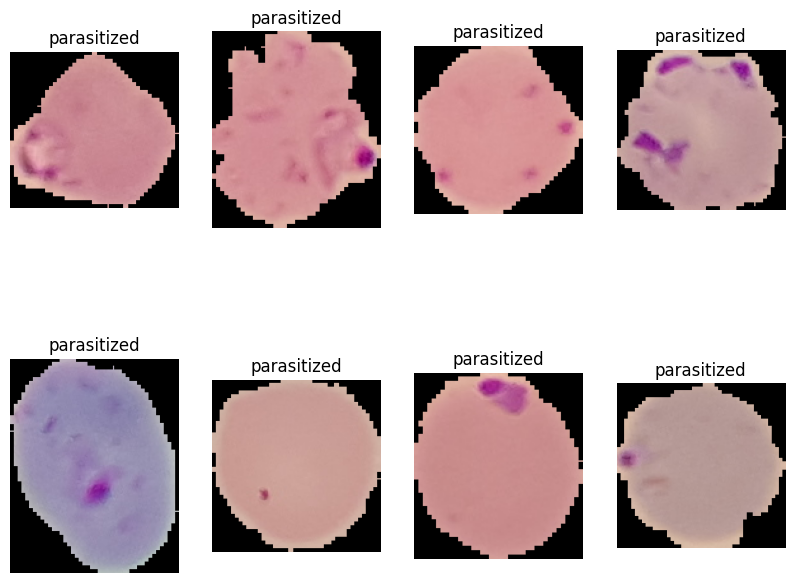

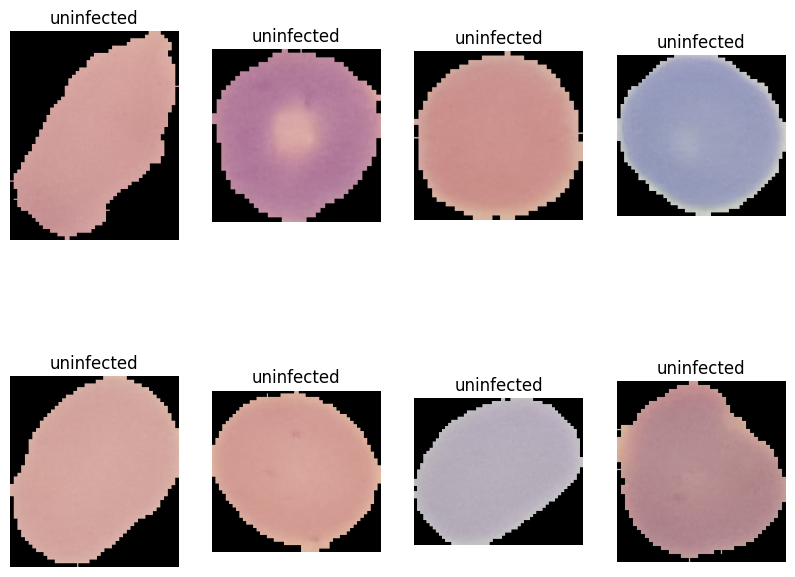

In [ ]:
##print 8 parasitized images stored under the training folder
# Library for reading and showing images
import matplotlib.image as mpimg
  #from google.colab.patches import cv2_imshow

for label in CATEGORIES:
  img_dir = os.path.join(TRAIN_DATA_DIR, label)
  file_path = os.listdir(img_dir)

  img_paths = [os.path.join(img_dir, img_file) for img_file in file_path[:8] ]

  fig = plt.figure(figsize = (10, 8))
  for i, img_path in enumerate(img_paths):
      ax = plt.subplot(2, 4, i+1)
      ax.axis('off')
      img = mpimg.imread(img_path)
      plt.imshow(img)
      plt.title(label)
  plt.show()

In [ ]:
# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
from PIL import Image

# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
#for folder_name in ['/parasitized/', '/uninfected/']:
for folder_name in CATEGORIES:
    # Path of the folder
    path = TRAIN_DATA_DIR  + folder_name
    images_path = os.listdir(path)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(path + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == 'parasitized/':

                train_labels.append('infected')

            else:

                train_labels.append('uninfected')

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0])

(24958, 64, 64, 3)
(24958,)
infected


In [ ]:
#function to print images
# Library for reading and showing images
import matplotlib.image as mpimg
#from google.colab.patches import cv2_imshow

def print_img(img_data, img_lbl):
# Declaring the number of rows
  rows = 3

# Declaring the number of columns
  cols = 4

  fig = plt.figure(figsize = (10, 8))

  for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(img_lbl))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.axis('off')
        ax.imshow(img_data[j, :])

        ax.set_title(img_lbl[random_index])

# Display the plot

plt.show()

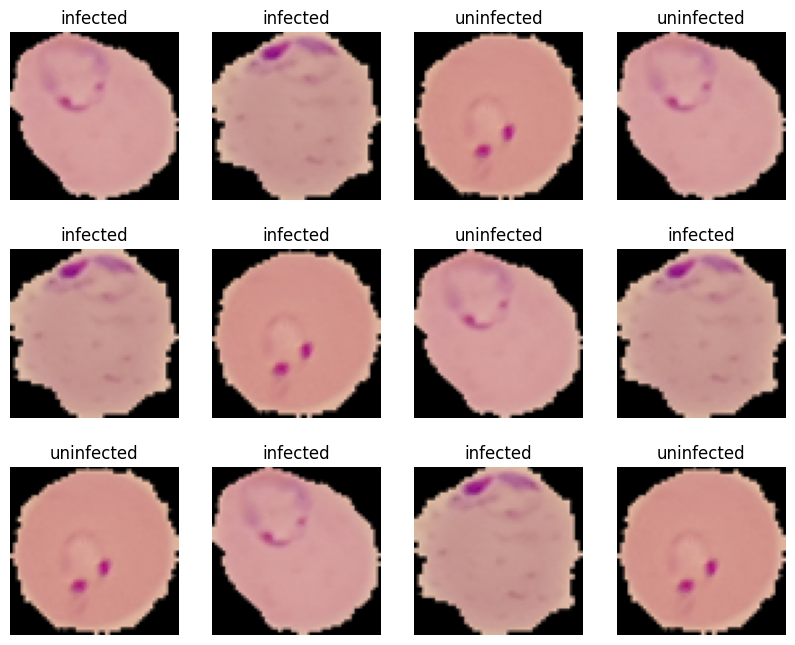

In [ ]:
print_img(train_images, train_labels)

In [ ]:
#Method to read images from training and test datasets from respective directories
# Set size of images to be consisten = 64 and store images into an array
# functions access a variable 'data_type' which has two valid values: training or test
# to load images from the respective folders and retuns an array.

from PIL import Image     #From Pillow import Image

def create_data(data_set):
  print('data type: ', data_set)
  data_list = []                        # create an empty list to store the images read for either training or test folders
  label_list = []                       # create an empty list to store labels for the images

# check which dataset to read. The two valid options are: Training or Test
  if data_set.lower() == 'training':   #if data_set is Training set data_dir to TRAIN_DATA_DIR
    data_dir = TRAIN_DATA_DIR

  elif data_set.lower() == 'test':      #if data_set is Test set data_dir to TEST_DATA_DIR
    data_dir = TEST_DATA_DIR
  else:
    print('Error - data_type is not valide.')

  for category in CATEGORIES:
      print('category: ', category)
      category = category +'/'                                                  # Looping over each category from the CATEGORIES list
      path = os.path.join(data_dir, category)               # Joining images with labels
      print('path', path)

      img_label = category
      print(f'loading images from {path}')

      for img in os.listdir(path):
        img_data = Image.open(path + img)     #Read image from dir and return type in Image
        img_data = img_data.resize((IMG_SIZE, IMG_SIZE))  # Resizing the images

        data_list.append(np.array(img_data))
        label_list.append(category)


  print('done reading -' , path)
  data_array = np.array(data_list)
  label_array = np.array(label_list)

  return data_array, label_array

In [ ]:
#Training data load
training_data, training_label = create_data('training')

#Test data load
test_data, test_label = create_data('test')


data type:  training
category:  parasitized
path /content/cell_images/train/parasitized/
loading images from /content/cell_images/train/parasitized/
category:  uninfected
path /content/cell_images/train/uninfected/
loading images from /content/cell_images/train/uninfected/
done reading - /content/cell_images/train/uninfected/
data type:  test
category:  parasitized
path /content/cell_images/test/parasitized/
loading images from /content/cell_images/test/parasitized/
category:  uninfected
path /content/cell_images/test/uninfected/
loading images from /content/cell_images/test/uninfected/
done reading - /content/cell_images/test/uninfected/


###<b> Check the shape of train and test images

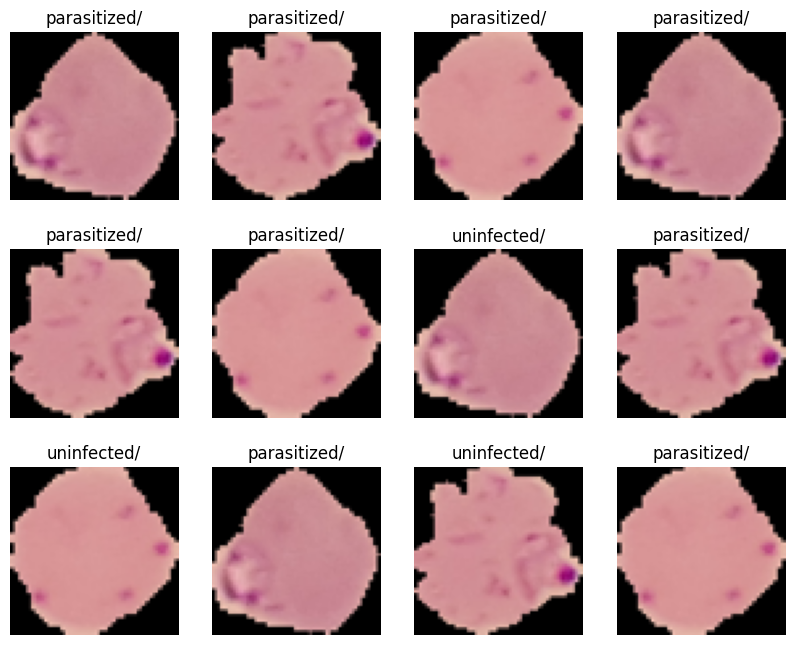

In [ ]:
print_img(training_data, training_label)

In [ ]:
print(training_data.size)
print(test_data.size)

306683904
31948800


###<b> Check the shape of train and test labels

In [ ]:
print("Training data shape: ", training_data.shape)
print("Test data shape: ", test_data.shape)

In [ ]:
print("Training label shape: ", training_label.shape)
print("Test label shape: ", test_label.shape)

Training label shape:  (24958,)
Test label shape:  (2600,)


####<b> Observations and insights: _____


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
print(type(training_data))
training_data.min()
training_data.max()

<class 'numpy.ndarray'>


255

####<b> Observations and insights: _____



###<b> Count the number of values in both uninfected and parasitized

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (training_data/255).astype('float32')

test_images = (test_data/255).astype('float32')

print(train_images.shape)
print(test_images.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


####<b> Observations and insights: _____

###<b> Plot to check if the data is balanced

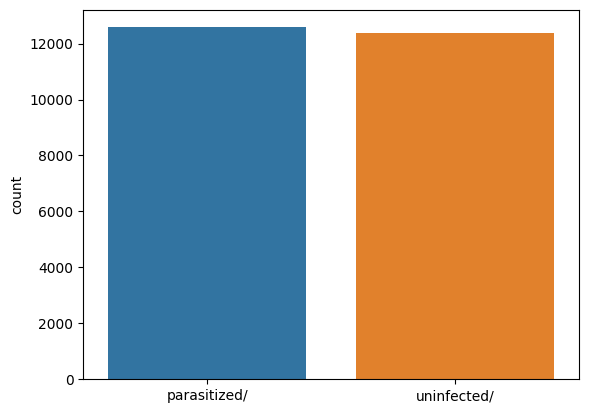

In [ ]:
# plot a graph

# Plot distribution of each category
count_plot = sns.countplot(x = training_label)
plt.Xlabel = ' Category'


####<b> Observations and insights: _____

### <b>Data Exploration</b>
Let's visualize the images from the train data

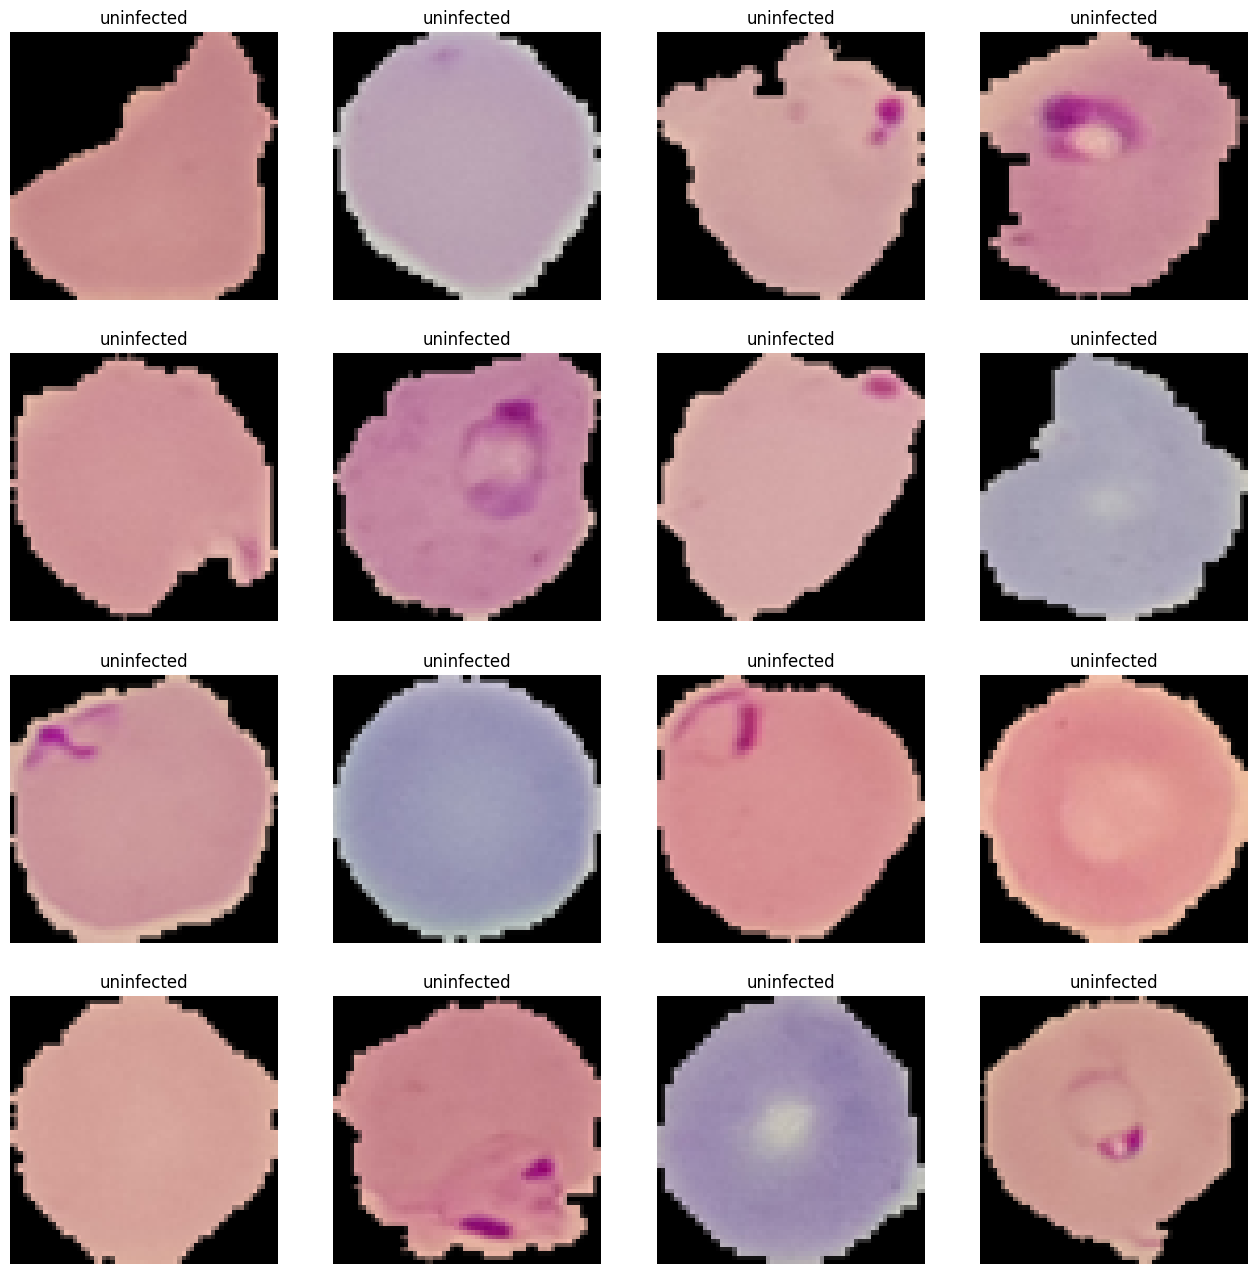

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if training_label[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: _____

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

<b> Mean image for parasitized

<b> Mean image for uninfected

####<b> Observations and insights: _____

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

###<b> Converting the test data

####<b>Observations and insights: _____

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

###<b> Gaussian Blurring on test data

####**Observations and insights: _____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

####<B>One Hot Encoding the train and test labels

###<b> Building the model

In [ ]:
#

###<b> Compiling the model

<b> Using Callbacks

<b> Fit and train our Model

###<b> Evaluating the model on test data

<b> Plotting the confusion matrix

<b>Plotting the train and validation curves

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


###<b> Building the Model

###<b> Compiling the model

<b> Using Callbacks

<b>Fit and Train the model

###<b> Evaluating the model

<b> Plotting the confusion matrix

<b> Plotting the train and the validation curves

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

###<b> Building the Model

###<b>Compiling the model

<b> Using callbacks

<b>Fit and train the model

<b>Plotting the train and validation accuracy

###<b>Evaluating the model

####<b>Observations and insights: ____

<b> Generate the classification report and confusion matrix

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

###<b> Use image data generator

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

####<b>Observations and insights: ____

###<b>Building the Model

<b>Using Callbacks

<b> Fit and Train the model

###<B>Evaluating the model

<b>Plot the train and validation accuracy

<B>Plotting the classification report and confusion matrix

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

###<b>Compiling the model

<b> using callbacks

<b>Fit and Train the model

<b>Plot the train and validation accuracy

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

<b>Plotting the classification report and confusion matrix

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?